In [9]:
import pandas as pd
import matplotlib.pyplot as plt 

In [1]:
import sqlite3

In [2]:
# connecting to sqlite3 database.
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

In [3]:
# writting qurey to create table.
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales(
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

In [5]:
# creating a sample_data to insert.
sample_data = [
    ('Apples',10,15),
    ('Oranges',5,10),
    ('Banana', 3,20),
    ('Apples', 5,15),
    ('Oranges',10,10),
    ('Banana',  5,20)
]

In [6]:
# writting query to insert data into the table.
cursor.executemany('INSERT INTO sales (product,quantity,price) VALUES (?,?,?)', sample_data)
conn.commit()

In [7]:
# For checking wether the values are inserted or not.
cursor.execute("SELECT * FROM sales")
rows = cursor.fetchall()

for row in rows:
    print(row)

(1, 'Apples', 10, 15.0)
(2, 'Oranges', 5, 10.0)
(3, 'Banana', 3, 20.0)
(4, 'Apples', 5, 15.0)
(5, 'Oranges', 10, 10.0)
(6, 'Banana', 5, 20.0)


In [8]:
# writting another query.
query = '''
SELECT 
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY product
'''

In [10]:
# loading result with pandas.
df=pd.read_sql_query(query,conn)

In [11]:
# printing the data 0r query which we done.
print(df)

   product  total_qty  total_revenue
0   Apples         15          225.0
1   Banana          8          160.0
2  Oranges         15          150.0


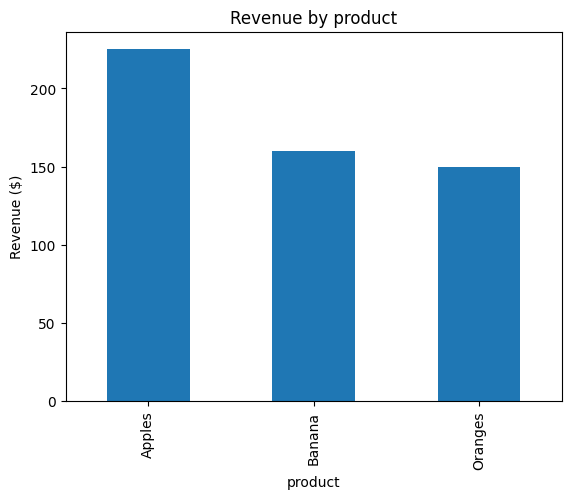

In [15]:
# visualize with matplotlib creating a chart.
df.plot(kind='bar', x='product', y='total_revenue', legend=False)
plt.title('Revenue by product')
plt.ylabel('Revenue ($)')
#plt.tight_layout()
plt.show()

In [16]:
plt.savefig('sales_chart.png')

<Figure size 640x480 with 0 Axes>